In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
%matplotlib inline

In [2]:
file_path = "data/SPAM Data.csv"
df = pd.read_csv(file_path)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
cv = CountVectorizer(decode_error='ignore')
X = cv.fit_transform(df['Message'])
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.3, random_state=120)

In [5]:
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9928205128205129

In [6]:
model.score(X_test, y_test)

0.9832535885167464

In [7]:
def visualize(label):
    words = ''
    
    for text in df[df['Category']==label]['Message']:
        text = text.lower()
        words+=text + ' '
    wordcloud = WordCloud(width=1000,height=500).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

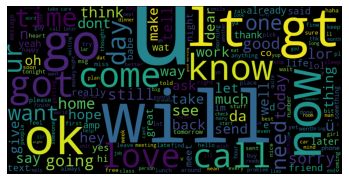

In [8]:
visualize('ham')

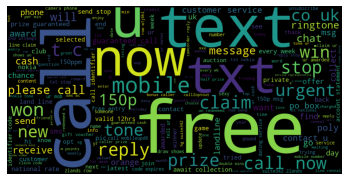

In [9]:
visualize('spam')